Description :- this program uses the dual moving average crossover to determine when to buy and sell stock


In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load data
from google.colab import files
uploaded = files.upload()

Saving INFY.csv to INFY.csv


In [ ]:
# store the data
infy = pd.read_csv('INFY.csv')
# show data
infy

,Date,Open,High,Low,Close,Volume in(000s)
0,9/8/2015 12:00:00 AM,531.00,537.00,526.15,529.40,2729.748
1,9/9/2015 12:00:00 AM,543.55,549.80,536.00,544.35,4574.332
2,9/10/2015 12:00:00 AM,542.45,545.75,530.50,540.23,4181.502
3,9/11/2015 12:00:00 AM,545.78,553.20,542.75,545.38,4941.905
4,9/14/2015 12:00:00 AM,549.50,552.00,541.33,549.88,3278.538
...,...,...,...,...,...,...
1218,9/1/2020 12:00:00 AM,926.25,935.00,912.10,914.15,6907.783
1219,9/2/2020 12:00:00 AM,915.00,926.40,913.50,924.00,5678.696
1220,9/3/2020 12:00:00 AM,926.50,949.40,924.00,935.55,8828.016
1221,9/4/2020 12:00:00 AM,915.00,929.50,914.45,919.15,8650.414


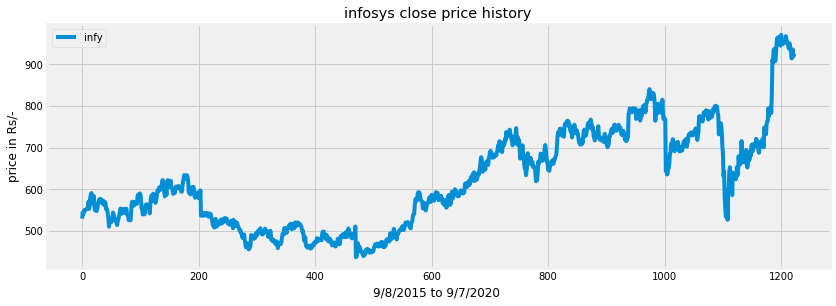

In [ ]:
#visualize data
plt.figure(figsize=(12.5,4.5))
plt.plot(infy['Close'],label='infy')
plt.title('infosys close price history')
plt.xlabel('9/8/2015 to 9/7/2020 ')
plt.ylabel('price in Rs/-')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# create a simple moving average with a 30 day window
sma30 = pd.DataFrame()
sma30['Close']=infy['Close'].rolling(window=30).mean()

In [ ]:
sma30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1218,947.466667
1219,947.670000
1220,948.590000
1221,948.466667


In [ ]:
# create moving  100 day average 
sma100=pd.DataFrame()
sma100['Close']=infy['Close'].rolling(window=100).mean()
sma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1218,783.3250
1219,786.2025
1220,789.1840
1221,791.9850


In [ ]:
# create moving  200 day average 
sma200=pd.DataFrame()
sma200['Close']=infy['Close'].rolling(window=200).mean()

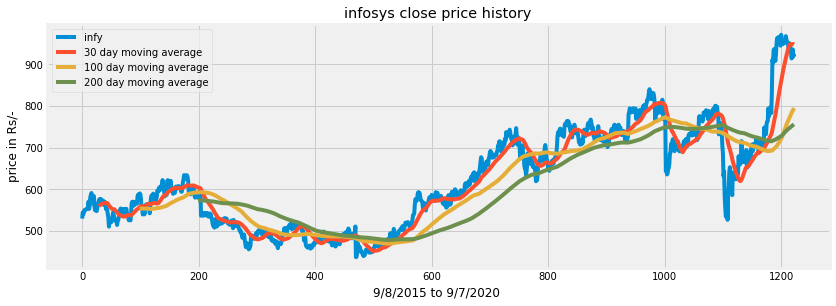

In [ ]:
#visualize data
plt.figure(figsize=(12.5,4.5))
plt.plot(infy['Close'],label='infy')
plt.plot(sma30['Close'],label='30 day moving average')
plt.plot(sma100['Close'],label='100 day moving average')
plt.plot(sma200['Close'],label='200 day moving average')
plt.title('infosys close price history')
plt.xlabel('9/8/2015 to 9/7/2020 ')
plt.ylabel('price in Rs/-')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# create new dataframe to store all the data
data = pd.DataFrame()
data['infy']=infy['Close']
data['sma30']=sma30['Close']
data['sma100']=sma100['Close']
data['sma200']=sma200['Close']
data

,infy,sma30,sma100,sma200
0,529.40,NaN,NaN,NaN
1,544.35,NaN,NaN,NaN
2,540.23,NaN,NaN,NaN
3,545.38,NaN,NaN,NaN
4,549.88,NaN,NaN,NaN
...,...,...,...,...
1218,914.15,947.466667,783.3250,751.39775
1219,924.00,947.670000,786.2025,752.49825
1220,935.55,948.590000,789.1840,753.65000
1221,919.15,948.466667,791.9850,754.68150


In [ ]:
# create function to signal when to buy or sell stock
def buy_sell(data):
  sigpriceBuy = []
  sigpricesell = []
  flag = -1

  for i in range(len(data)):
    if data['sma30'][i]  > data['sma200'][i]:
      if flag !=1:
        sigpriceBuy.append(data['infy'][i])
        sigpricesell.append(np.nan)
        flag = 1
      else:
        sigpriceBuy.append(np.nan)
        sigpricesell.append(np.nan)
    elif data['sma100'][i] < data['sma200'][i]:
      if flag!=0:
        sigpriceBuy.append(np.nan)
        sigpricesell.append(data['infy'][i])
        flag = 0
      else:
        sigpriceBuy.append(np.nan)
        sigpricesell.append(np.nan)
    else:
      sigpriceBuy.append(np.nan)
      sigpricesell.append(np.nan)
  return (sigpriceBuy,sigpricesell)                  

In [ ]:
# store the buy and sell variable
buy_sell = buy_sell(data)
data['buy_sig_price']=buy_sell[0]
data['sell_sig_price']=buy_sell[1]     

In [ ]:
data

,infy,sma30,sma100,buy_sig_price,sell_sig_price
0,529.40,NaN,NaN,NaN,NaN
1,544.35,NaN,NaN,NaN,NaN
2,540.23,NaN,NaN,NaN,NaN
3,545.38,NaN,NaN,NaN,NaN
4,549.88,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1218,914.15,947.466667,783.3250,NaN,NaN
1219,924.00,947.670000,786.2025,NaN,NaN
1220,935.55,948.590000,789.1840,NaN,NaN
1221,919.15,948.466667,791.9850,NaN,NaN


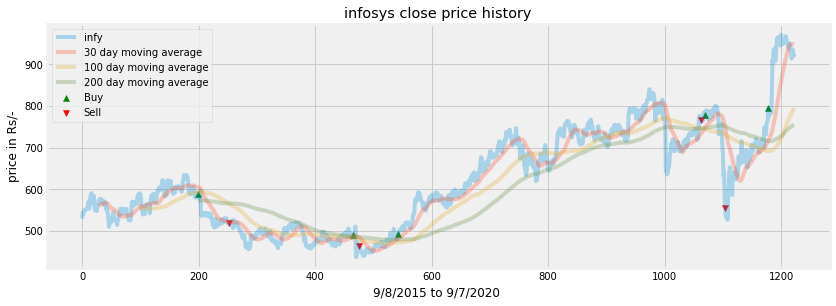

In [ ]:
#visualize the data and strategy to buy and sell stock
plt.figure(figsize=(12.5,4.5))
plt.plot(data['infy'],label='infy',alpha=0.3)
plt.plot(data['sma30'],label='30 day moving average',alpha=0.3)
plt.plot(data['sma100'],label='100 day moving average',alpha=0.3)
plt.plot(data['sma200'],label='200 day moving average',alpha=0.3)
plt.scatter(data.index,data['buy_sig_price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['sell_sig_price'],label='Sell',marker='v',color='red')
plt.title('infosys close price history')
plt.xlabel('9/8/2015 to 9/7/2020 ')
plt.ylabel('price in Rs/-')
plt.legend(loc='upper left')
plt.show()
